In [ ]:
#unsupervised

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv("/mnt/c/Users/joaof/Downloads/full_data_by15.csv",usecols=[1,2])

In [6]:
data

,ds,y
0,2019-12-01 00:00:00,36
1,2019-12-01 00:15:00,11
2,2019-12-01 00:30:00,5
3,2019-12-01 00:45:00,4
4,2019-12-01 01:00:00,3
...,...,...
35389,2020-12-03 17:15:00,18
35390,2020-12-03 17:30:00,20
35391,2020-12-03 17:45:00,14
35392,2020-12-03 18:00:00,13


In [11]:
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [58]:
isolation_forest = IsolationForest(n_estimators=300,random_state=42)
isolation_forest.fit(data['y'].values.reshape(-1, 1))

IsolationForest(n_estimators=300, random_state=42)

In [59]:
xx = np.linspace(data['y'].min(), data['y'].max(), len(data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

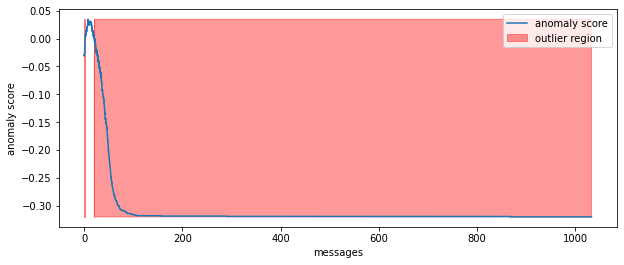

In [60]:
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('messages')
plt.show();

In [56]:
len(data[outlier==1]) #small inlier, lost of outliers

661

In [64]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/john/.conda/envs/pubmed/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWa

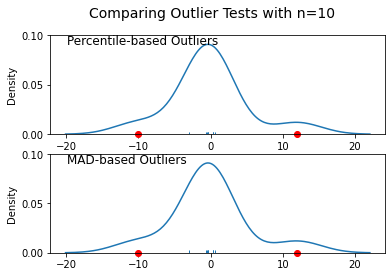

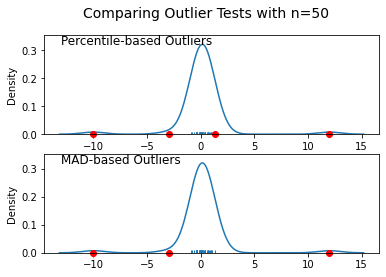

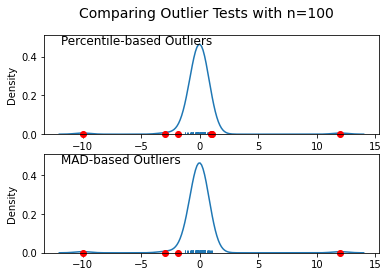

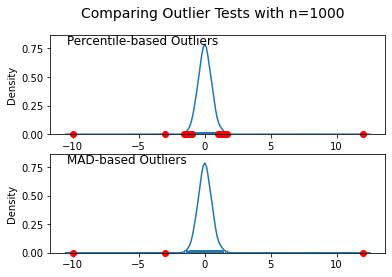

In [65]:
#https://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    for num in [10, 50, 100, 1000]:
        # Generate some data
        x = np.random.normal(0, 0.5, num-3)

        # Add three outliers...
        x = np.r_[x, -3, -10, 12]
        plot(x)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

main()

In [67]:
data[mad_based_outlier(data["y"])]

<ipython-input-65-2bb88f49e69d>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


,ds,y
233,2019-12-03 10:15:00,49
326,2019-12-04 09:30:00,49
428,2019-12-05 11:00:00,51
516,2019-12-06 09:00:00,50
520,2019-12-06 10:00:00,49
...,...,...
35273,2020-12-02 11:15:00,57
35276,2020-12-02 12:00:00,61
35278,2020-12-02 12:30:00,48
35288,2020-12-02 15:00:00,61


In [68]:
data[percentile_based_outlier(data["y"])]


,ds,y
138,2019-12-02 10:30:00,43
232,2019-12-03 10:00:00,47
233,2019-12-03 10:15:00,49
237,2019-12-03 11:15:00,43
322,2019-12-04 08:30:00,43
...,...,...
35291,2020-12-02 15:45:00,54
35292,2020-12-02 16:00:00,44
35356,2020-12-03 09:00:00,43
35358,2020-12-03 09:30:00,44
